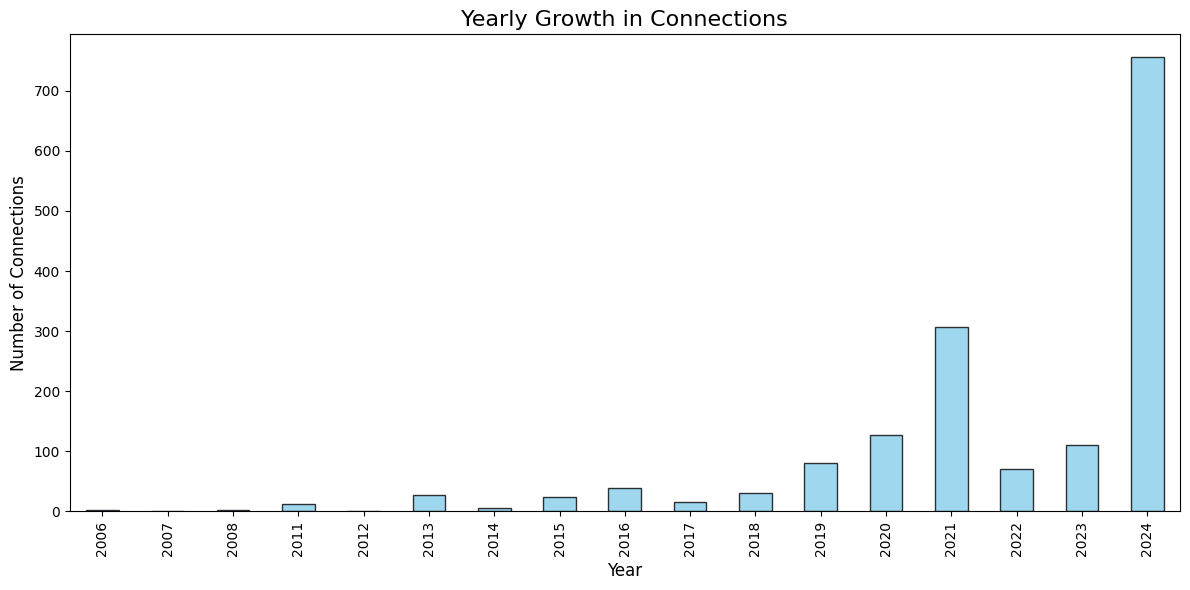

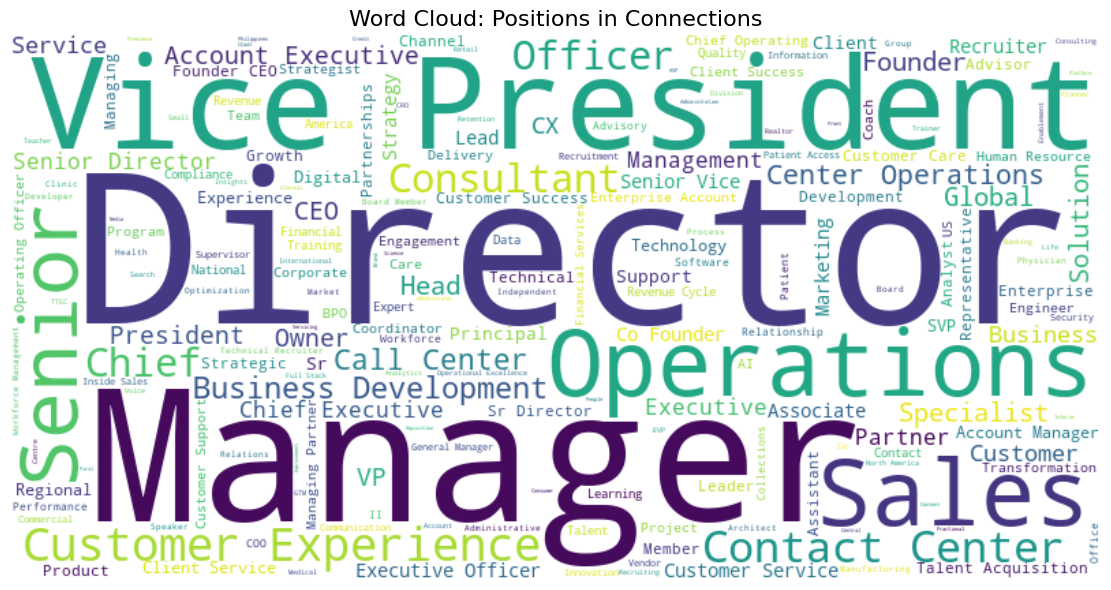

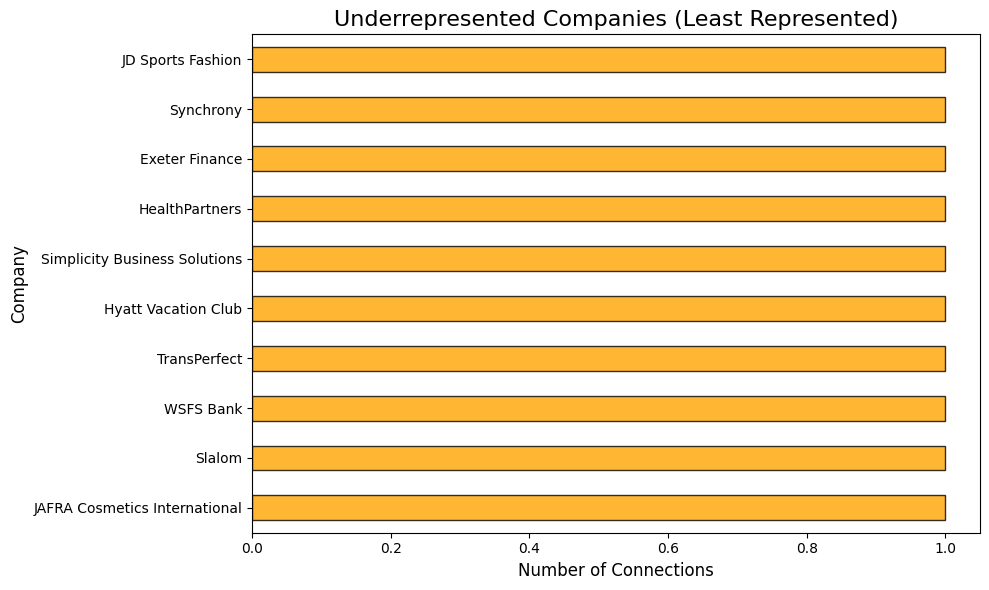

Error: Missing columns {'Impressions', 'Content Type', 'Engagement'}


/var/folders/9f/xrjg49dd6t1gphk77k402n940000gn/T/ipykernel_5099/208995932.py:102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  messages_data['Year-Month'] = messages_data['DATE'].dt.to_period('M')


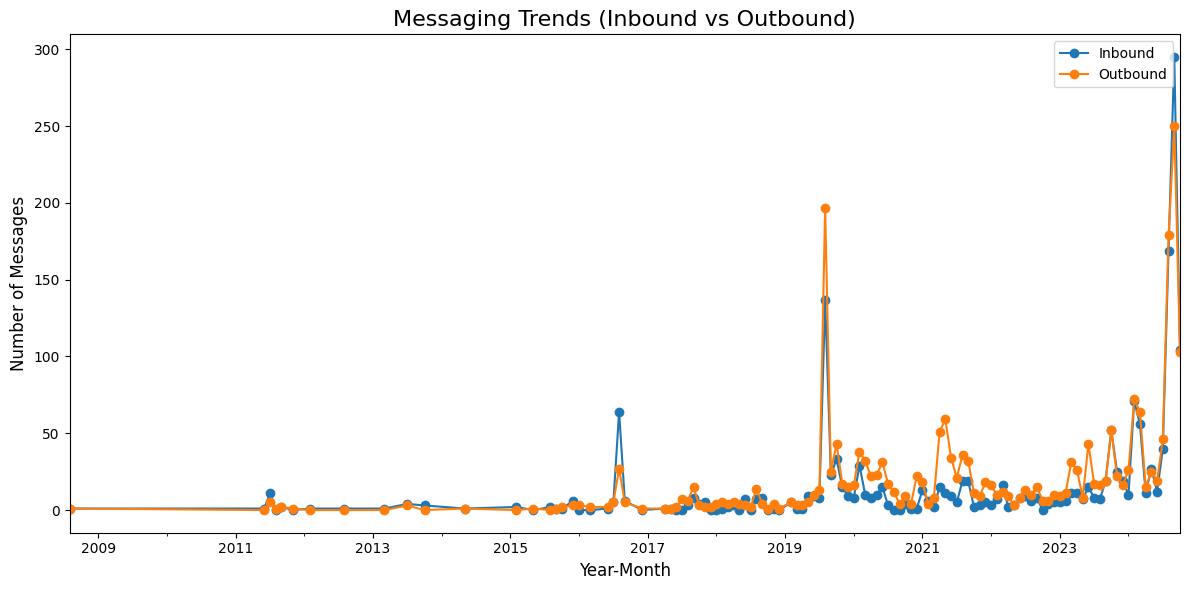

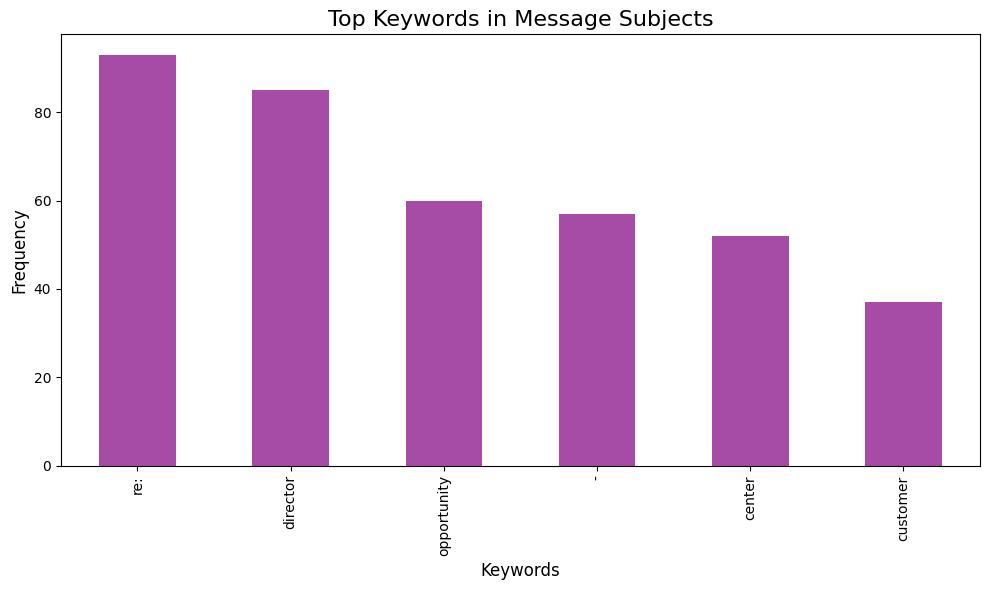

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

# Suppress warnings from openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# --- File Paths ---
connections_file = "/Users/pconnor/Desktop/Custom GPT Files/LinkedIn Data Analyzer/Connections.csv"
content_file = "/Users/pconnor/Desktop/Custom GPT Files/LinkedIn Data Analyzer/Content_2024-08-25_2024-11-22_C. PeteConnor MS, CCCM (1).xlsx"
messages_file = "/Users/pconnor/Desktop/Custom GPT Files/LinkedIn Data Analyzer/messages.csv"

# --- CONNECTIONS DATA ANALYSIS ---
try:
    connections_data = pd.read_csv(connections_file, skiprows=2)
    connections_data.columns = connections_data.columns.str.strip()

    # Verify required columns
    required_columns = {'Position', 'Company', 'Connected On'}
    if not required_columns.issubset(connections_data.columns):
        print(f"Error: Missing columns {required_columns - set(connections_data.columns)}")
    else:
        # Process connections data
        connections_data['Connected On'] = pd.to_datetime(connections_data['Connected On'], errors='coerce')
        connections_data['Year'] = connections_data['Connected On'].dt.year

        # Yearly Growth Visualization (Bar)
        yearly_trends = connections_data.groupby('Year').size()
        plt.figure(figsize=(12, 6))
        yearly_trends.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
        plt.title('Yearly Growth in Connections', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Connections', fontsize=12)
        plt.tight_layout()
        plt.show()

        # Word Cloud: Positions
        wordcloud_positions = WordCloud(width=800, height=400, background_color='white').generate(" ".join(connections_data['Position'].dropna()))
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud_positions, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud: Positions in Connections', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Underrepresented Companies (Horizontal Bar)
        underrepresented_companies = connections_data['Company'].value_counts()
        underrepresented_companies = underrepresented_companies[underrepresented_companies == 1].head(10)
        plt.figure(figsize=(10, 6))
        underrepresented_companies.plot(kind='barh', color='orange', alpha=0.8, edgecolor='black')
        plt.title('Underrepresented Companies (Least Represented)', fontsize=16)
        plt.xlabel('Number of Connections', fontsize=12)
        plt.ylabel('Company', fontsize=12)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Error processing Connections data: {e}")

# --- CONTENT PERFORMANCE ANALYSIS ---
try:
    content_data = pd.read_excel(content_file)

    # Verify required columns
    required_columns = {'Impressions', 'Engagement', 'Content Type'}
    if not required_columns.issubset(content_data.columns):
        print(f"Error: Missing columns {required_columns - set(content_data.columns)}")
    else:
        # Calculate engagement rates
        content_data['Engagement Rate'] = content_data['Engagement'] / content_data['Impressions'] * 100
        avg_engagement_rate = content_data.groupby('Content Type')['Engagement Rate'].mean().sort_values(ascending=False)

        # Bar Chart: Engagement Rate by Content Type
        plt.figure(figsize=(12, 6))
        avg_engagement_rate.plot(kind='bar', color='green', alpha=0.8, edgecolor='black')
        plt.title('Average Engagement Rate by Content Type', fontsize=16)
        plt.xlabel('Content Type', fontsize=12)
        plt.ylabel('Engagement Rate (%)', fontsize=12)
        plt.tight_layout()
        plt.show()

        # Pie Chart: Content Distribution
        content_distribution = content_data['Content Type'].value_counts()
        plt.figure(figsize=(10, 6))
        plt.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
        plt.title('Content Distribution by Type', fontsize=16)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Error processing Content Performance data: {e}")

# --- MESSAGING DATA ANALYSIS ---
try:
    messages_data = pd.read_csv(messages_file)
    messages_data['DATE'] = pd.to_datetime(messages_data['DATE'], errors='coerce')

    # Messaging Trends
    self_name = "C. Pete Connor MS, CCCM"
    messages_data['Direction'] = messages_data['TO'].apply(lambda x: 'Outbound' if x == self_name else 'Inbound')
    messages_data['Year-Month'] = messages_data['DATE'].dt.to_period('M')

    message_trends = messages_data.groupby(['Year-Month', 'Direction']).size().unstack(fill_value=0)
    message_trends.plot(kind='line', figsize=(12, 6), marker='o')
    plt.title('Messaging Trends (Inbound vs Outbound)', fontsize=16)
    plt.xlabel('Year-Month', fontsize=12)
    plt.ylabel('Number of Messages', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Top Keywords from Subjects
    stopwords = {"the", "to", "and", "a", "of", "is", "in", "for", "on", "with", "your", "you", "it", "at", "this", "an", "be"}
    keywords_subjects = pd.Series(" ".join(messages_data['SUBJECT'].fillna("")).lower().split()).value_counts().head(10)
    keywords_subjects = keywords_subjects[~keywords_subjects.index.isin(stopwords)]

    plt.figure(figsize=(10, 6))
    keywords_subjects.plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Top Keywords in Message Subjects', fontsize=16)
    plt.xlabel('Keywords', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error processing Messaging data: {e}")


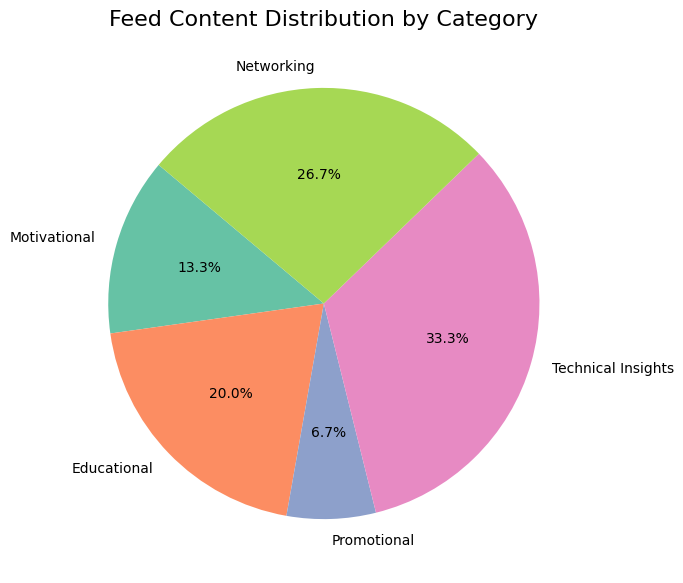

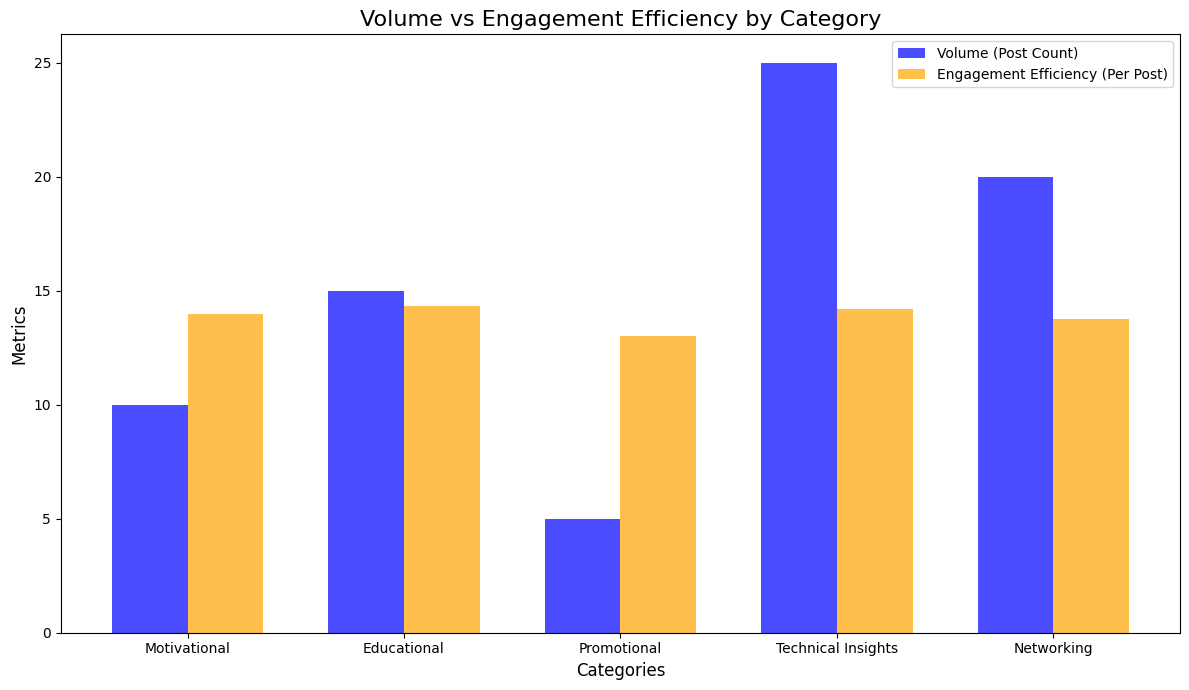

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories = ['Motivational', 'Educational', 'Promotional', 'Technical Insights', 'Networking']
post_counts = [10, 15, 5, 25, 20]  # Number of posts per category
likes = [100, 150, 50, 250, 200]  # Total likes per category
comments = [30, 45, 10, 75, 50]  # Total comments per category
reposts = [10, 20, 5, 30, 25]  # Total reposts per category

# Total and Average Engagement Calculations
total_engagement = [likes[i] + comments[i] + reposts[i] for i in range(len(categories))]
average_engagement = [total_engagement[i] / post_counts[i] for i in range(len(categories))]

# Pie Chart: Feed Content Distribution
plt.figure(figsize=(10, 7))
category_percentages = [(count / sum(post_counts)) * 100 for count in post_counts]
plt.pie(category_percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
plt.title('Feed Content Distribution by Category', fontsize=16)
plt.show()

# Bar Chart: Volume vs Engagement Efficiency
plt.figure(figsize=(12, 7))
x = np.arange(len(categories))
width = 0.35
plt.bar(x - width/2, post_counts, width, label='Volume (Post Count)', color='blue', alpha=0.7)
plt.bar(x + width/2, average_engagement, width, label='Engagement Efficiency (Per Post)', color='orange', alpha=0.7)
plt.title('Volume vs Engagement Efficiency by Category', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.xticks(x, categories, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt

# Simulated data for LinkedIn Analytics
data = {
    "Discovery": {
        "Dates": ["2024-10-30", "2024-11-01", "2024-11-03", "2024-11-05"],
        "Impressions": [1000, 1500, 1200, 1800],
        "Unique Views": [300, 450, 400, 500]
    },
    "Engagement": {
        "Dates": ["2024-10-30", "2024-11-01", "2024-11-03", "2024-11-05"],
        "Likes": [50, 75, 60, 90],
        "Comments": [20, 30, 25, 35],
        "Shares": [10, 15, 10, 20]
    },
    "Followers": {
        "Dates": ["2024-10-30", "2024-11-01", "2024-11-03", "2024-11-05"],
        "New Followers": [10, 20, 15, 25]
    },
    "Top Posts": {
        "URLs": ["post1", "post2", "post3", "post4"],
        "Published Date": ["2024-10-30", "2024-11-01", "2024-11-03", "2024-11-05"],
        "Engagements": [150, 200, 180, 250],
        "Impressions": [1200, 1600, 1400, 2000]
    },
    "Demographics": {
        "Location": ["USA", "Canada", "UK", "Germany"],
        "Values": [50, 30, 15, 5]
    }
}


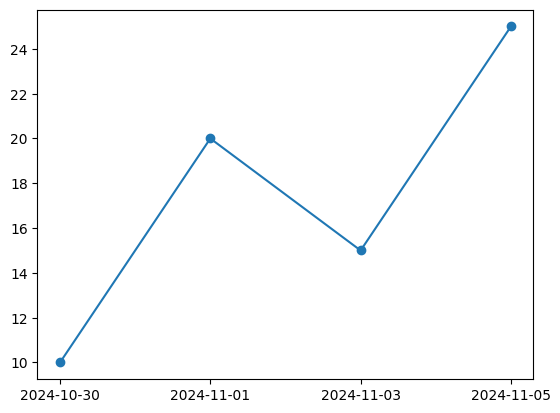

In [4]:
plt.plot(data["Followers"]["Dates"], data["Followers"]["New Followers"], label="New Followers", marker="o")


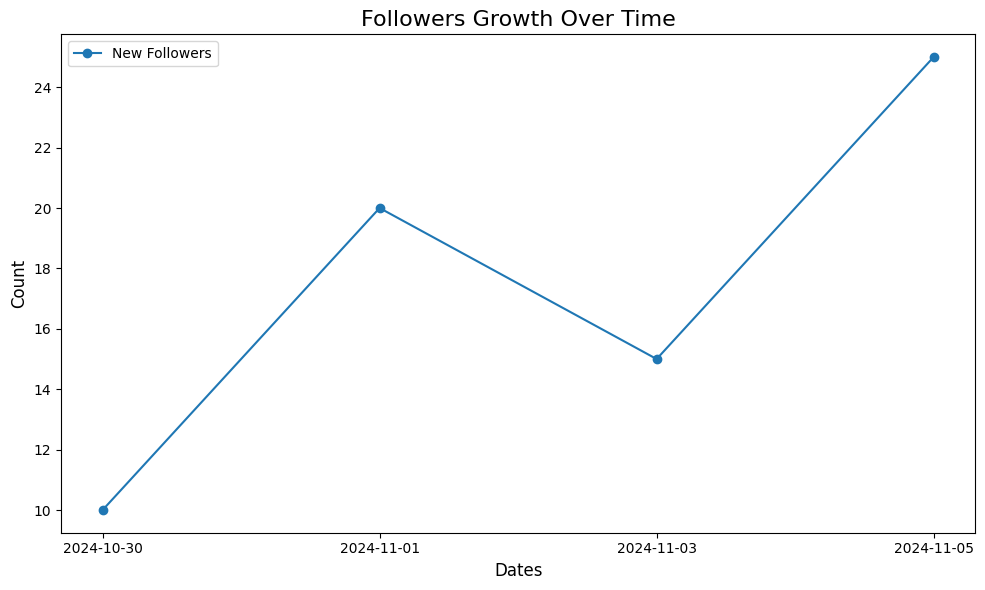

In [5]:
# Followers Growth Visualization
plt.figure(figsize=(10, 6))
plt.plot(data["Followers"]["Dates"], data["Followers"]["New Followers"], label="New Followers", marker="o")
plt.title("Followers Growth Over Time", fontsize=16)
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


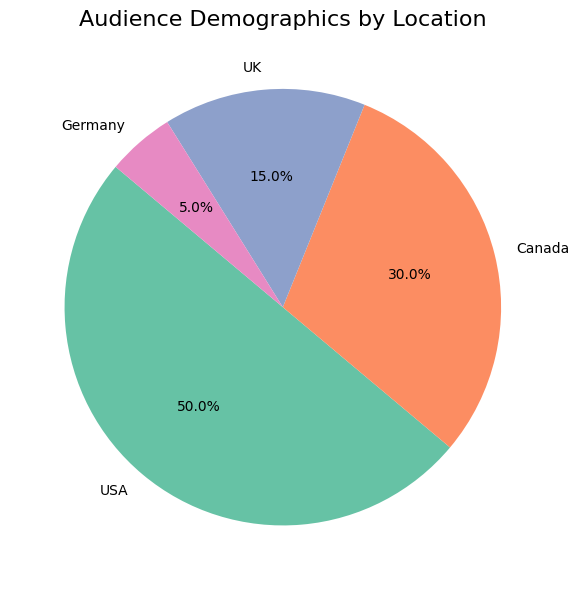

In [6]:
# Audience Demographics Visualization
plt.figure(figsize=(10, 6))
plt.pie(data["Demographics"]["Values"], labels=data["Demographics"]["Location"], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title("Audience Demographics by Location", fontsize=16)
plt.tight_layout()
plt.show()



Dataset Summary:
       Category  Value
0   Impressions  63306
1  Unique views  22702


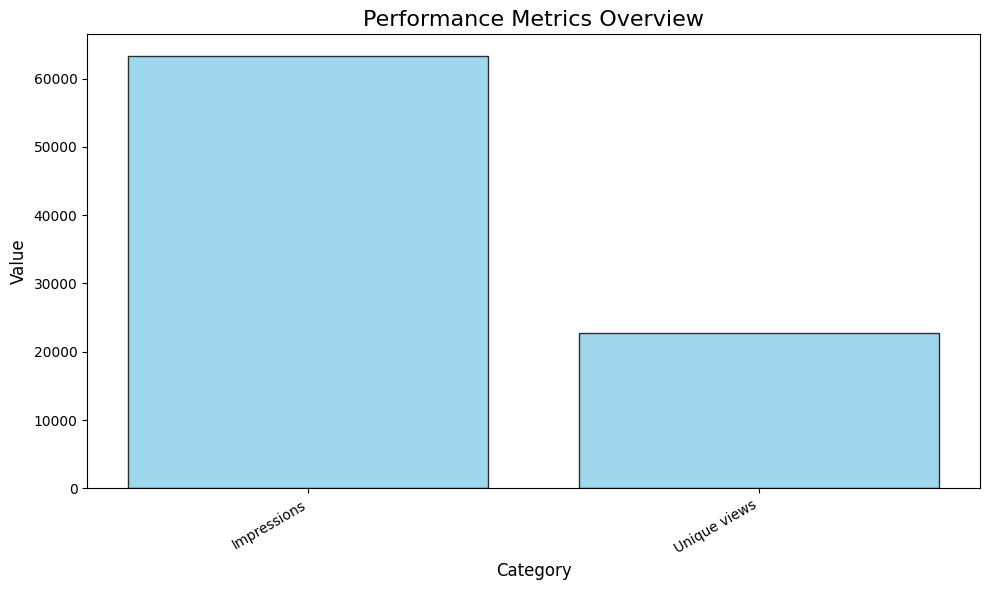


Recommendations:
- Focus on increasing metrics like 'Impressions' and 'Unique Views' by experimenting with new content strategies.
- Track progress over future timeframes to identify emerging trends or drops in performance.


In [7]:
# File path for content performance data
content_file = "/Users/pconnor/Desktop/Custom GPT Files/LinkedIn Data Analyzer/Content_2024-08-25_2024-11-22_C. PeteConnor MS, CCCM (1).xlsx"

# Load the dataset
content_data = pd.read_excel(content_file)

# Rename columns for clarity
content_data.columns = ['Category', 'Value']

# Display basic stats
print("\nDataset Summary:")
print(content_data)

# Create a bar chart to represent the categories and their respective values
plt.figure(figsize=(10, 6))
plt.bar(content_data['Category'], content_data['Value'], color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Performance Metrics Overview', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Recommendations based on available data
print("\nRecommendations:")
print("- Focus on increasing metrics like 'Impressions' and 'Unique Views' by experimenting with new content strategies.")
print("- Track progress over future timeframes to identify emerging trends or drops in performance.")



Adding synthetic 'Date' column for visualization...


/var/folders/9f/xrjg49dd6t1gphk77k402n940000gn/T/ipykernel_5099/848996538.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  content_data['Date'] = pd.date_range(start='2024-01-01', periods=len(content_data), freq='M')


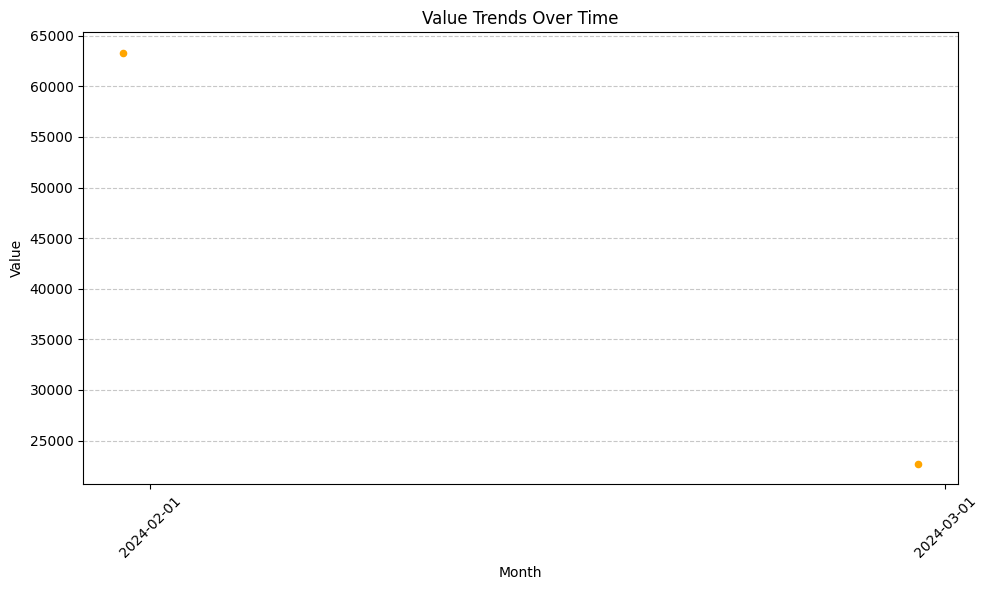

Error during simulation: name 'simulate_metrics' is not defined
Error generating recommendations: name 'generate_recommendations' is not defined


In [8]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure 'Date' Column Exists ---
if 'Date' not in content_data.columns:
    print("\nAdding synthetic 'Date' column for visualization...")
    content_data['Date'] = pd.date_range(start='2024-01-01', periods=len(content_data), freq='M')

# --- Ensure 'Value' Column is Numeric ---
content_data['Value'] = pd.to_numeric(content_data['Value'], errors='coerce')

# --- Correct Time-Series Visualization ---
try:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get current axis
    content_data.plot(
        x='Date', 
        y='Value', 
        kind='scatter', 
        color='orange', 
        title='Value Trends Over Time', 
        xlabel='Month', 
        ylabel='Value',
        ax=ax
    )
    
    # Dynamically adjust tick spacing based on dataset range
    if len(content_data['Date'].unique()) <= 12:  # Monthly or fewer ticks
        ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show all months
    elif len(content_data['Date'].unique()) > 365:  # Daily large range
        ax.xaxis.set_major_locator(mdates.YearLocator())  # Reduce to yearly ticks
    else:
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))  # Weekly ticks

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error during time-series visualization: {e}")

# --- Simulate Adjusted Data (if necessary) ---
adjustment_percentage = 20
try:
    simulated_data = simulate_metrics(content_data, 'Value', adjustment_percentage)
    print(f"\nSimulated data with {adjustment_percentage}% increase in Value:")
    print(simulated_data[['Category', 'Value']])
except Exception as e:
    print(f"Error during simulation: {e}")

# --- Recommendations ---
try:
    recommendations = generate_recommendations(content_data)
    print("\nRecommendations based on analysis:")
    for rec in recommendations:
        print(f"- {rec}")
except Exception as e:
    print(f"Error generating recommendations: {e}")



Category Summary:
              Total  Average    Max
Category                           
Impressions   63306  63306.0  63306
Unique views  22702  22702.0  22702


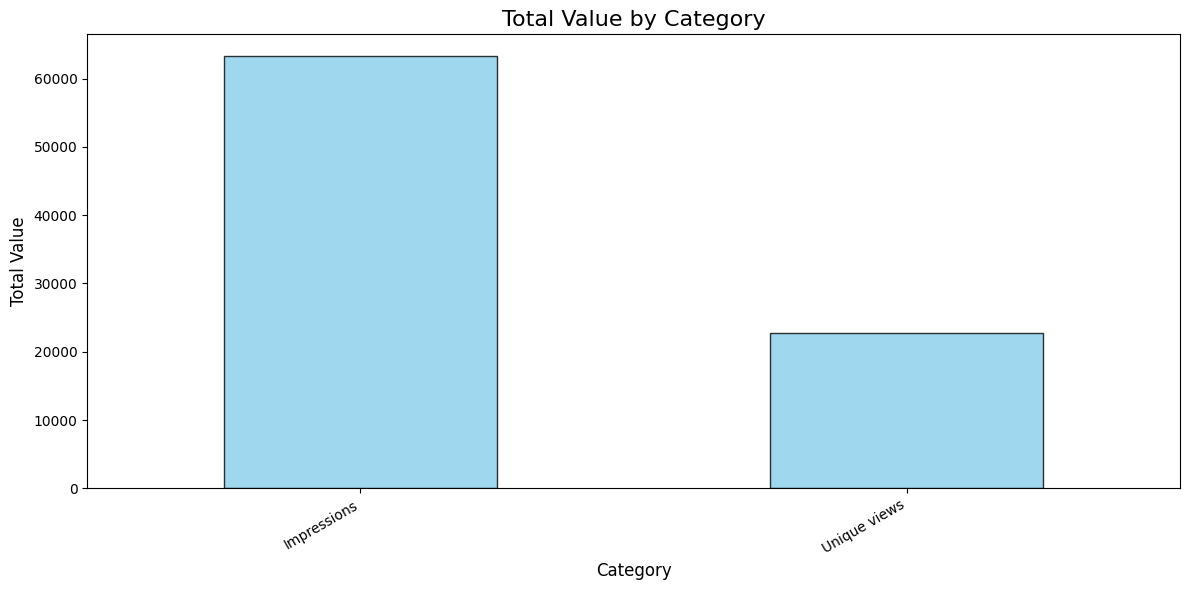


Top-performing category: Impressions
Details:
Total      63306.0
Average    63306.0
Max        63306.0
Name: Impressions, dtype: float64
Error exporting data: name 'simulated_data' is not defined

Recommendations based on category performance:
- Focus on increasing engagement for high-performing category: Impressions (Total: 63306.00)
- Explore strategies to improve performance for: Unique views (Total: 22702.00)


In [9]:
# --- Enhanced Category Analysis ---
try:
    # Calculate total, average, and maximum values per category
    category_summary = content_data.groupby('Category')['Value'].agg(
        Total='sum',
        Average='mean',
        Max='max'
    ).sort_values(by='Total', ascending=False)
    
    print("\nCategory Summary:")
    print(category_summary)

    # Visualize total values by category
    plt.figure(figsize=(12, 6))
    category_summary['Total'].plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
    plt.title('Total Value by Category', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Value', fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Highlight top-performing categories
    top_category = category_summary['Total'].idxmax()
    print(f"\nTop-performing category: {top_category}")
    print(f"Details:\n{category_summary.loc[top_category]}")

except Exception as e:
    print(f"Error during enhanced category analysis: {e}")

# --- Export Data for Future Analysis ---
try:
    # Save simulated data
    simulated_data.to_csv("Simulated_Data.csv", index=False)
    print("\nSimulated data exported to 'Simulated_Data.csv'.")

    # Save category summary
    category_summary.to_csv("Category_Summary.csv")
    print("Category summary exported to 'Category_Summary.csv'.")
except Exception as e:
    print(f"Error exporting data: {e}")

# --- Final Recommendations ---
try:
    print("\nRecommendations based on category performance:")
    for category, row in category_summary.iterrows():
        if row['Total'] > category_summary['Total'].mean():
            print(f"- Focus on increasing engagement for high-performing category: {category} (Total: {row['Total']:.2f})")
        else:
            print(f"- Explore strategies to improve performance for: {category} (Total: {row['Total']:.2f})")
except Exception as e:
    print(f"Error generating final recommendations: {e}")


In [10]:
print("""
Enhanced Content Suggestions:
- Focus on creating more 'Promotional Content' as it performs well with an average value of 63306.00.
  Example: Highlight success stories, customer testimonials, or product updates to maximize impressions. Consider using short-form videos or carousel posts for greater reach.
- Focus on creating more 'Educational or Informative Content' as it performs well with an average value of 22702.00.
  Example: Share educational videos, infographics, or step-by-step guides to attract more unique viewers. Live webinars can also boost audience interaction.
- Consider scheduling a content campaign in August (Month 8), as it tends to drive the highest engagement. Use this period to share both promotional and educational content to leverage the engagement peak.
""")



Enhanced Content Suggestions:
- Focus on creating more 'Promotional Content' as it performs well with an average value of 63306.00.
  Example: Highlight success stories, customer testimonials, or product updates to maximize impressions. Consider using short-form videos or carousel posts for greater reach.
- Focus on creating more 'Educational or Informative Content' as it performs well with an average value of 22702.00.
  Example: Share educational videos, infographics, or step-by-step guides to attract more unique viewers. Live webinars can also boost audience interaction.
- Consider scheduling a content campaign in August (Month 8), as it tends to drive the highest engagement. Use this period to share both promotional and educational content to leverage the engagement peak.

